In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [28]:
csv_path = "simple_final_results.csv"

df = pd.read_csv(csv_path)
df['genres_refusal'] = 'none'

df_covid = pd.read_csv("covid19_final_results.csv")

df = pd.concat([df[df['chatgpt_model'] == 'gpt-4-1106-preview'], df_covid])

df['dataset'] = df['dataset'].map({'simple': "LT", "covid19": "C19"})

In [29]:
# Processar as colunas

columns = [
    'uid',
    'model_id',
    'chatgpt_model',
    'dataset',
    'genres_refusal',
    'md_activities_count',
    'md_gateways_count',
    'md_events_count',
    'md_nodes_count',
    'md_sequence_flows_count',
    'md_pools_count',
    'md_lanes_count',

    'temperature',
    'prompt_name',
    'seed',

    'genres_real_prompt_tokens',
    'genres_real_completion_tokens',
    'genres_real_total_tokens',
    'genres_billed_estimate',

    'word_count',
    'sent_count',

    'taasc_sca_MLS',
    'taasc_sca_MLT',
    'taasc_sca_MLC',
    'taasc_sca_C_S',
    'taasc_sca_VP_T',
    'taasc_sca_C_T',
    'taasc_sca_DC_C',
    'taasc_sca_DC_T',
    'taasc_sca_T_S',
    'taasc_sca_CT_T',
    'taasc_sca_CP_T',
    'taasc_sca_CP_C',
    'taasc_sca_CN_T',
    'taasc_sca_CN_C',

    'md_tokens_count',
    'md_characters_count'
]

rename_dict = {
    'uid': 'UID',
    'model_id': "Model",
    'chatgpt_model': "GPT",
    'dataset': "Dataset",
    'genres_refusal': "Refusal",
    'md_activities_count': "A",
    'md_gateways_count': "G",
    'md_events_count': "E",
    'md_nodes_count': "N",
    'md_sequence_flows_count': "F",
    'md_pools_count': "P",
    'md_lanes_count': "L",
    "word_count": "W",
    "sent_count": "S",

    'taasc_sca_MLS': "MLS",
    'taasc_sca_MLT' : "MLT",
    'taasc_sca_MLC': "MLC",
    'taasc_sca_C_S': "C/S",
    'taasc_sca_VP_T': "VP/T",
    'taasc_sca_C_T': "C/T",
    'taasc_sca_DC_C': "DC/C",
    'taasc_sca_DC_T': 'DC/T',
    'taasc_sca_T_S': "T/S",
    'taasc_sca_CT_T': "CT/T",
    'taasc_sca_CP_T': "CP/T",
    'taasc_sca_CP_C': "CP/C",
    'taasc_sca_CN_T': "CN/T",
    'taasc_sca_CN_C': "CN/C",

    'temperature': 'Temp',
    'prompt_name': "Prompt",
    'seed': "Seed",

    'genres_real_prompt_tokens': "PT",
    'genres_real_completion_tokens': "CT",
    'genres_real_total_tokens': "TK",
    'genres_billed_estimate': "BE",

    'md_tokens_count': "PTE",
    'md_characters_count': "MCC"
}

selected_df = df[columns]
renamed_df = selected_df.rename(columns=rename_dict)

renamed_df['W/S'] = renamed_df['W'] / renamed_df['S']

renamed_df['Prompt'] = renamed_df['Prompt'].map({'simple.txt': 'P1', 'sbvr.txt': 'P2', 'instructions-simple.txt': 'P3', 'instructions-complex.txt': 'P4'})

renamed_df

,UID,Model,GPT,Dataset,Refusal,A,G,E,N,F,...,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C,PTE,MCC,W/S
0,bf84c6be,Definitions_08srj4t,gpt-4-1106-preview,LT,none,10,10,2,22,12,...,0.736842,1.000000,0.473684,0.421053,0.266667,2.263158,1.433333,11141,20935,23.789474
3,0202680c,Definitions_0yfls6t,gpt-4-1106-preview,LT,none,11,6,2,19,8,...,0.562500,1.333333,0.500000,0.375000,0.214286,1.187500,0.678571,9227,17394,23.833333
6,71db7a34,Definitions_08srj4t,gpt-4-1106-preview,LT,none,10,10,2,22,12,...,0.638889,0.837209,0.277778,0.166667,0.115385,1.750000,1.211538,11141,20935,17.475000
8,220b6866,Definitions_06eaj8q,gpt-4-1106-preview,LT,none,5,2,0,7,2,...,0.933333,1.071429,0.666667,0.600000,0.310345,0.800000,0.413793,4861,9360,20.500000
11,d97281d8,Definitions_0yfls6t,gpt-4-1106-preview,LT,none,11,6,2,19,8,...,0.392857,1.000000,0.357143,0.392857,0.343750,1.500000,1.312500,9227,17394,17.407407
13,a02b36f4,Definitions_08srj4t,gpt-4-1106-preview,LT,none,10,10,2,22,12,...,0.545455,1.047619,0.409091,0.409091,0.290323,1.363636,0.967742,11141,20935,17.142857
15,f04899a6,Definitions_0yfls6t,gpt-4-1106-preview,LT,none,11,6,2,19,8,...,0.846154,1.000000,0.769231,0.230769,0.125000,2.076923,1.125000,9227,17394,24.384615
16,44a0c18c,Definitions_06eaj8q,gpt-4-1106-preview,LT,none,5,2,0,7,2,...,0.714286,0.933333,0.571429,0.642857,0.360000,1.928571,1.080000,4861,9360,23.466667
18,11ba443c,Definitions_06eaj8q,gpt-4-1106-preview,LT,none,5,2,0,7,2,...,0.684211,0.950000,0.421053,0.526316,0.322581,1.842105,1.129032,4861,9360,23.350000
19,12a418cc,Definitions_0yfls6t,gpt-4-1106-preview,LT,none,11,6,2,19,8,...,0.333333,1.038462,0.259259,0.481481,0.433333,1.666667,1.500000,9227,17394,19.769231


In [45]:
d = renamed_df.groupby("Model").first().reset_index()

d = d[['UID', 'Dataset', 'A', "G", "E", "N", "F", "P", "L"]]

latex_table = d.to_latex(index=True, caption="Overview of BPMN models in dataset", label="tab:dataset-overview")

print(latex_table)

d

\begin{table}
\caption{Overview of BPMN models in dataset}
\label{tab:dataset-overview}
\begin{tabular}{lllrrrrrrr}
\toprule
 & UID & Dataset & A & G & E & N & F & P & L \\
\midrule
0 & 220b6866 & LT & 5 & 2 & 0 & 7 & 2 & 3 & 0 \\
1 & bf84c6be & LT & 10 & 10 & 2 & 22 & 12 & 1 & 4 \\
2 & 0202680c & LT & 11 & 6 & 2 & 19 & 8 & 1 & 4 \\
3 & 975d5902 & C19 & 5 & 5 & 3 & 13 & 8 & 2 & 1 \\
4 & a3944150 & C19 & 7 & 16 & 7 & 30 & 23 & 2 & 2 \\
5 & 3530e8e8 & C19 & 5 & 10 & 6 & 21 & 16 & 2 & 1 \\
6 & 2d6b0512 & C19 & 11 & 6 & 7 & 24 & 13 & 2 & 1 \\
\bottomrule
\end{tabular}
\end{table}



,UID,Dataset,A,G,E,N,F,P,L
0,220b6866,LT,5,2,0,7,2,3,0
1,bf84c6be,LT,10,10,2,22,12,1,4
2,0202680c,LT,11,6,2,19,8,1,4
3,975d5902,C19,5,5,3,13,8,2,1
4,a3944150,C19,7,16,7,30,23,2,2
5,3530e8e8,C19,5,10,6,21,16,2,1
6,2d6b0512,C19,11,6,7,24,13,2,1


# Características dos datasets

In [62]:
d = renamed_df.groupby('Dataset')[['A', "G", "E", "N", "F", "P", "L", "MCC", "PT", "CT", "BE"]].mean()

print(d[['A', 'G', 'E', 'N', 'F', 'P', 'L']].applymap(lambda x: f'{x:.1f}').to_latex(index=True, caption="Dataset characteristics", label="tab:dataset-characteristics-1"))
print(d[['MCC', 'PT', 'CT', 'BE']].to_latex(index=True, caption="Dataset characteristics", label="tab:dataset-characteristics-1"))

d

\begin{table}
\caption{Dataset characteristics}
\label{tab:dataset-characteristics-1}
\begin{tabular}{llllllll}
\toprule
 & A & G & E & N & F & P & L \\
Dataset &  &  &  &  &  &  &  \\
\midrule
C19 & 7.0 & 9.2 & 5.8 & 22.0 & 15.0 & 2.0 & 1.2 \\
LT & 8.7 & 6.0 & 1.3 & 16.0 & 7.3 & 1.7 & 2.7 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Dataset characteristics}
\label{tab:dataset-characteristics-1}
\begin{tabular}{lrrrr}
\toprule
 & MCC & PT & CT & BE \\
Dataset &  &  &  &  \\
\midrule
C19 & 61992.250000 & 23379.000000 & 465.500000 & 0.247755 \\
LT & 15896.333333 & 6506.333333 & 425.666667 & 0.077833 \\
\bottomrule
\end{tabular}
\end{table}



,A,G,E,N,F,P,L,MCC,PT,CT,BE
Dataset,,,,,,,,,,,
C19,7.000000,9.25,5.750000,22.0,15.000000,2.000000,1.250000,61992.250000,23379.000000,465.500000,0.247755
LT,8.666667,6.00,1.333333,16.0,7.333333,1.666667,2.666667,15896.333333,6506.333333,425.666667,0.077833


In [48]:
d = renamed_df.groupby('Dataset')[['PTE', 'MCC', 'PT', 'CT', 'BE']].sum()

print(d.to_latex(index=True, caption="Total dataset processing", label="tab:dataset-processing"))

d

\begin{table}
\caption{Total dataset processing}
\label{tab:dataset-processing}
\begin{tabular}{lrrrrr}
\toprule
 & PTE & MCC & PT & CT & BE \\
Dataset &  &  &  &  &  \\
\midrule
C19 & 522940 & 991876 & 374064 & 7448 & 3.964080 \\
LT & 100916 & 190756 & 78076 & 5108 & 0.934000 \\
\bottomrule
\end{tabular}
\end{table}



,PTE,MCC,PT,CT,BE
Dataset,,,,,
C19,522940,991876,374064,7448,3.96408
LT,100916,190756,78076,5108,0.93400


# Análise das descrições geradas

## Analisar recusa de prompt

Em quantos casos de teste a LLM se recusou a processar o modelo BPMN?

In [49]:
refusal_df = renamed_df.groupby('Refusal').count().reset_index()

print(refusal_df[['Refusal', 'UID']].to_latex(index=True, caption="Table showing the models that were not processed", label="tab:dataset-refusal-overview"))

refusal_df[['Refusal', "UID"]]

\begin{table}
\caption{Table showing the models that were not processed}
\label{tab:dataset-refusal-overview}
\begin{tabular}{llr}
\toprule
 & Refusal & UID \\
\midrule
0 & full & 1 \\
1 & none & 25 \\
2 & partial & 2 \\
\bottomrule
\end{tabular}
\end{table}



,Refusal,UID
0,full,1
1,none,25
2,partial,2


O gpt-4-1106-preview se recusou a processar o modelo BPMN 2 vezes completamente, 1 vez parcialmente (mostrando uma descrição que considera parcial). Em 25 instâncias, tentou gerar a descrição completa.

Em seguida, precisamos analisar em que situações houve a recusa.

In [51]:
refusal_df = renamed_df[ renamed_df['Refusal'] != 'none' ][['UID', 'Dataset', 'Prompt', 'A', "G", "E", "N", "F", "P", "L"]]
refusal_df = refusal_df.groupby('Prompt').count()[["UID"]]

print(refusal_df.to_latex(index=True, caption="Table showing which prompts showed a refusal in processing", label="tab:refusal-prompts"))

refusal_df

\begin{table}
\caption{Table showing which prompts showed a refusal in processing}
\label{tab:refusal-prompts}
\begin{tabular}{lr}
\toprule
 & UID \\
Prompt &  \\
\midrule
P1 & 3 \\
\bottomrule
\end{tabular}
\end{table}



,UID
Prompt,
P1,3


Percebemos que somente no prompt 'simple.txt' houve recusa de processamento, então vamos analisar o motivo disso inicialmente através das descrições geradas com esse prompt.

In [52]:
simple_df = renamed_df[ renamed_df['Prompt'] == 'P1' ]
simple_df = simple_df[['UID', 'Dataset', 'Prompt', 'A', "G", "E", "N", "F", "P", "L", 'Refusal']]

print(simple_df.to_latex(index=True, caption="Overview of which BPMN models were not processed", label="tab:dataset-refusal-overview-2"))

simple_df

\begin{table}
\caption{Overview of which BPMN models were not processed}
\label{tab:dataset-refusal-overview-2}
\begin{tabular}{llllrrrrrrrl}
\toprule
 & UID & Dataset & Prompt & A & G & E & N & F & P & L & Refusal \\
\midrule
6 & 71db7a34 & LT & P1 & 10 & 10 & 2 & 22 & 12 & 1 & 4 & none \\
11 & d97281d8 & LT & P1 & 11 & 6 & 2 & 19 & 8 & 1 & 4 & none \\
18 & 11ba443c & LT & P1 & 5 & 2 & 0 & 7 & 2 & 3 & 0 & none \\
1 & 3530e8e8 & C19 & P1 & 5 & 10 & 6 & 21 & 16 & 2 & 1 & full \\
4 & f67064f8 & C19 & P1 & 11 & 6 & 7 & 24 & 13 & 2 & 1 & partial \\
5 & a3944150 & C19 & P1 & 7 & 16 & 7 & 30 & 23 & 2 & 2 & partial \\
10 & 975d5902 & C19 & P1 & 5 & 5 & 3 & 13 & 8 & 2 & 1 & none \\
\bottomrule
\end{tabular}
\end{table}



,UID,Dataset,Prompt,A,G,E,N,F,P,L,Refusal
6,71db7a34,LT,P1,10,10,2,22,12,1,4,none
11,d97281d8,LT,P1,11,6,2,19,8,1,4,none
18,11ba443c,LT,P1,5,2,0,7,2,3,0,none
1,3530e8e8,C19,P1,5,10,6,21,16,2,1,full
4,f67064f8,C19,P1,11,6,7,24,13,2,1,partial
5,a3944150,C19,P1,7,16,7,30,23,2,2,partial
10,975d5902,C19,P1,5,5,3,13,8,2,1,none


Analisando a recusa ou não dos processos pela LLM, percebemos que existe uma relação entre a complexidade do modelo, e a probabilidade do modelo se recusar a fazer o processamento.

In [36]:
numerical_data = simple_df[[ 'A', "G", "E", "N", "F", "P", "L" ]]
df2 = simple_df

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

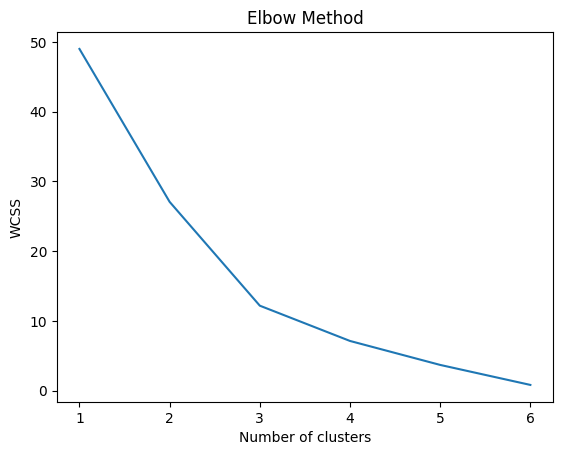

In [37]:
# Elbow Method
wcss = []
for i in range(1, 7): # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# Choose the number of clusters (k) based on the Elbow Method
k = 3  # for example

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster information to your original dataframe
df2['Cluster'] = clusters


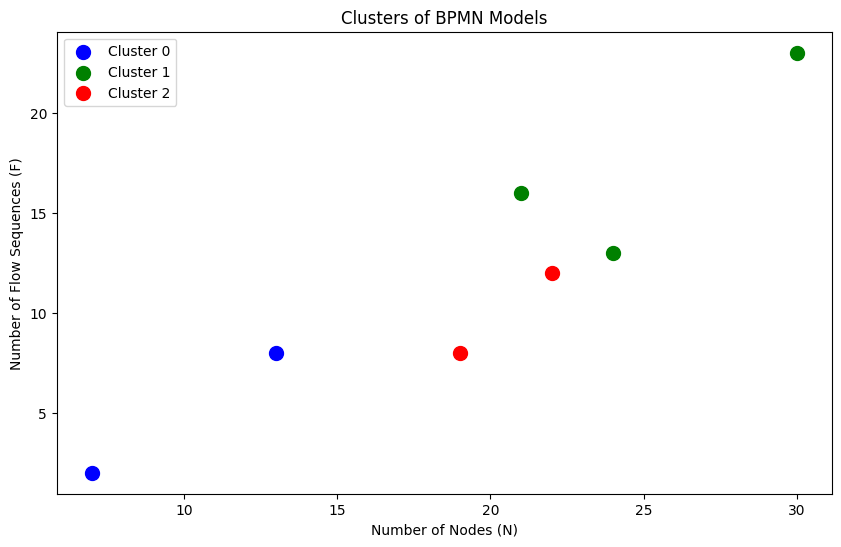

In [39]:
# Visualize clusters with legend
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']  # Add more colors if you have more clusters

for i in range(k):
    plt.scatter(df2[df2['Cluster'] == i]['N'], df2[df2['Cluster'] == i]['F'],
                color=colors[i], label=f'Cluster {i}', s=100)

plt.title('Clusters of BPMN Models')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Number of Flow Sequences (F)')
plt.legend()
plt.show()

In [53]:
df4 = df2[["UID", "Dataset", 'Cluster','A', "G", "E", "N", "F", "P", "L", "Refusal"]].sort_values(by="Cluster", ascending=True)

print(df4.to_latex(index=True, caption="Clusterized BPMN models", label="tab:dataset-clusterized"))

df4

\begin{table}
\caption{Clusterized BPMN models}
\label{tab:dataset-clusterized}
\begin{tabular}{lllrrrrrrrrl}
\toprule
 & UID & Dataset & Cluster & A & G & E & N & F & P & L & Refusal \\
\midrule
18 & 11ba443c & LT & 0 & 5 & 2 & 0 & 7 & 2 & 3 & 0 & none \\
10 & 975d5902 & C19 & 0 & 5 & 5 & 3 & 13 & 8 & 2 & 1 & none \\
1 & 3530e8e8 & C19 & 1 & 5 & 10 & 6 & 21 & 16 & 2 & 1 & full \\
4 & f67064f8 & C19 & 1 & 11 & 6 & 7 & 24 & 13 & 2 & 1 & partial \\
5 & a3944150 & C19 & 1 & 7 & 16 & 7 & 30 & 23 & 2 & 2 & partial \\
6 & 71db7a34 & LT & 2 & 10 & 10 & 2 & 22 & 12 & 1 & 4 & none \\
11 & d97281d8 & LT & 2 & 11 & 6 & 2 & 19 & 8 & 1 & 4 & none \\
\bottomrule
\end{tabular}
\end{table}



,UID,Dataset,Cluster,A,G,E,N,F,P,L,Refusal
18,11ba443c,LT,0,5,2,0,7,2,3,0,none
10,975d5902,C19,0,5,5,3,13,8,2,1,none
1,3530e8e8,C19,1,5,10,6,21,16,2,1,full
4,f67064f8,C19,1,11,6,7,24,13,2,1,partial
5,a3944150,C19,1,7,16,7,30,23,2,2,partial
6,71db7a34,LT,2,10,10,2,22,12,1,4,none
11,d97281d8,LT,2,11,6,2,19,8,1,4,none


Dessa forma, identificamos 3 clusters de modelos que correspondem a diferentes complexidades de modelo. Quais são as características desses grupos?

In [60]:
df5 = df2.groupby('Cluster')[['A', "G", "E", "N", "F", "P", "L"]].mean().reset_index()

print(df5.round(1).applymap(lambda x: f'{x:.1f}').to_latex(index=True, caption="Overall complexity by cluster", label="tab:dataset-characteristics-cluster"))

df5

\begin{table}
\caption{Overall complexity by cluster}
\label{tab:dataset-characteristics-cluster}
\begin{tabular}{lllllllll}
\toprule
 & Cluster & A & G & E & N & F & P & L \\
\midrule
0 & 0.0 & 5.0 & 3.5 & 1.5 & 10.0 & 5.0 & 2.5 & 0.5 \\
1 & 1.0 & 7.7 & 10.7 & 6.7 & 25.0 & 17.3 & 2.0 & 1.3 \\
2 & 2.0 & 10.5 & 8.0 & 2.0 & 20.5 & 10.0 & 1.0 & 4.0 \\
\bottomrule
\end{tabular}
\end{table}



,Cluster,A,G,E,N,F,P,L
0,0,5.000000,3.500000,1.500000,10.0,5.000000,2.5,0.500000
1,1,7.666667,10.666667,6.666667,25.0,17.333333,2.0,1.333333
2,2,10.500000,8.000000,2.000000,20.5,10.000000,1.0,4.000000


Com isso, pode-se concluir que, dado um prompt simples, modelos BPMN com mais de 20.5 elementos de fluxo, e 17.3 fluxos de sequência podem ser rejeitados pelo modelo gpt-4-1106-preview.

Para os outros prompts, não houve recusa, o que indica que um prompt engineering melhor pode aumentar esse threshold. Para pesquisas futuras, pode ser feito uma análise com modelos ainda mais complexos e ver até onde chega esse threshold. Também é importante salientar que as políticas das LLMs comerciais mudam toda hora, e essa métrica pode ser alterada a qualquer momento.

# Análise de complexidade

Já que o prompt simple.txt possui instâncias onde a descrição não foi gerada, vamos desconsiderar esse prompt, e analisar somente os outros.

O objetivo dessa análise de complexidade é avaliar como se comportam as métricas de complexidade sintática em relação a complexidade dos modelos.

Mais adianta, tentaremos avaliar se a modulação de complexidade textual através do prompt foi efetiva.

In [58]:
# Buscar os casos onde prompt não é o simple.txt
df3 = renamed_df[ renamed_df['Prompt'] != 'P1' ]

df3 = df3.groupby('Dataset')[ ['W', 'S', 'W/S', "MLS", "MLT", "MLC", "C/S", "VP/T", 'C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C'] ].mean()
df6 = df3.round(1)
df6 = df6.applymap(lambda x: f'{x:.1f}')

df6_1 = df6[['W', 'S', 'W/S', 'MLS', 'MLT', 'MLC', 'C/S', 'VP/T']]
df6_2 = df6[['C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C']]

print(df6_1.to_latex(index=True, caption="Dataset complexity characteristics", label="tab:dataset-complexity-characteristics-1"))
print(df6_2.to_latex(index=True, caption="Dataset complexity characteristics", label="tab:dataset-complexity-characteristics-2"))

df6

\begin{table}
\caption{Dataset complexity characteristics}
\label{tab:dataset-complexity-characteristics-1}
\begin{tabular}{lllllllll}
\toprule
 & W & S & W/S & MLS & MLT & MLC & C/S & VP/T \\
Dataset &  &  &  &  &  &  &  &  \\
\midrule
C19 & 451.6 & 20.5 & 22.9 & 19.8 & 19.7 & 12.5 & 1.6 & 2.1 \\
LT & 356.6 & 16.2 & 22.3 & 20.1 & 19.2 & 11.6 & 1.8 & 2.4 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Dataset complexity characteristics}
\label{tab:dataset-complexity-characteristics-2}
\begin{tabular}{llllllllll}
\toprule
 & C/T & DC/C & DC/T & T/S & CT/T & CP/T & CP/C & CN/T & CN/C \\
Dataset &  &  &  &  &  &  &  &  &  \\
\midrule
C19 & 1.6 & 0.4 & 0.7 & 1.0 & 0.5 & 0.5 & 0.3 & 2.5 & 1.6 \\
LT & 1.7 & 0.4 & 0.7 & 1.1 & 0.5 & 0.5 & 0.3 & 1.7 & 1.0 \\
\bottomrule
\end{tabular}
\end{table}



,W,S,W/S,MLS,MLT,MLC,C/S,VP/T,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C
Dataset,,,,,,,,,,,,,,,,,
C19,451.6,20.5,22.9,19.8,19.7,12.5,1.6,2.1,1.6,0.4,0.7,1.0,0.5,0.5,0.3,2.5,1.6
LT,356.6,16.2,22.3,20.1,19.2,11.6,1.8,2.4,1.7,0.4,0.7,1.1,0.5,0.5,0.3,1.7,1.0


Analisando a média das métricas de complexidade pra cada dataset, pode-se perceber que, para modelos mais complexos, as métricas de complexidade se mantém estáveis. As descrições acabam sendo mais longas, mostrando maior número de palavras e sentenças, mas sem aumento da complexidade sintática.

In [61]:
# Buscar os casos onde prompt não é o simple.txt
df3 = renamed_df[ renamed_df['Prompt'] != 'P1' ]

df3 = df3.groupby('Prompt')[ ['W', 'S', 'W/S', "MLS", "MLT", "MLC", "C/S", "VP/T", 'C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C'] ].mean()
df3 = df3.round(1)
df3 = df3.applymap(lambda x: f'{x:.1f}')

df6 = df3

df6_1 = df6[['W', 'S', 'W/S', 'MLS', 'MLT', 'MLC', 'C/S', 'VP/T']]
df6_2 = df6[['C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C']]


print(df6_1.to_latex(index=True, caption="Syntactic Complexity by Prompt", label="tab:syn-complexity-prompt-1"))
print(df6_2.to_latex(index=True, caption="Syntactic Complexity by Prompt", label="tab:syn-complexity-prompt-2"))

df3

\begin{table}
\caption{Syntactic Complexity by Prompt}
\label{tab:syn-complexity-prompt-1}
\begin{tabular}{lllllllll}
\toprule
 & W & S & W/S & MLS & MLT & MLC & C/S & VP/T \\
Prompt &  &  &  &  &  &  &  &  \\
\midrule
P2 & 331.4 & 16.9 & 20.6 & 18.4 & 17.9 & 11.2 & 1.7 & 2.1 \\
P3 & 398.4 & 17.7 & 23.6 & 20.6 & 19.8 & 11.7 & 1.8 & 2.3 \\
P4 & 502.7 & 21.4 & 23.6 & 20.9 & 20.8 & 13.5 & 1.6 & 2.3 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Syntactic Complexity by Prompt}
\label{tab:syn-complexity-prompt-2}
\begin{tabular}{llllllllll}
\toprule
 & C/T & DC/C & DC/T & T/S & CT/T & CP/T & CP/C & CN/T & CN/C \\
Prompt &  &  &  &  &  &  &  &  &  \\
\midrule
P2 & 1.7 & 0.4 & 0.7 & 1.0 & 0.5 & 0.5 & 0.3 & 1.9 & 1.2 \\
P3 & 1.7 & 0.4 & 0.8 & 1.0 & 0.6 & 0.5 & 0.3 & 2.1 & 1.3 \\
P4 & 1.6 & 0.4 & 0.7 & 1.0 & 0.5 & 0.4 & 0.3 & 2.4 & 1.5 \\
\bottomrule
\end{tabular}
\end{table}



,W,S,W/S,MLS,MLT,MLC,C/S,VP/T,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C
Prompt,,,,,,,,,,,,,,,,,
P2,331.4,16.9,20.6,18.4,17.9,11.2,1.7,2.1,1.7,0.4,0.7,1.0,0.5,0.5,0.3,1.9,1.2
P3,398.4,17.7,23.6,20.6,19.8,11.7,1.8,2.3,1.7,0.4,0.8,1.0,0.6,0.5,0.3,2.1,1.3
P4,502.7,21.4,23.6,20.9,20.8,13.5,1.6,2.3,1.6,0.4,0.7,1.0,0.5,0.4,0.3,2.4,1.5


Analisando as métricas de complexidade sintática para os diferentes prompts, pode-se perceber que, o prompt influencia primariamente o tamanho da descrição.

O prompt que utiliza SBVR gerou descrições menores, e com MLS (mean length of sentence), MLT (mean length of T-unit), MLC (mean length of clause) levemente menor.

A conclusão dessa análise é:
- É possível modelar a complexidade da descrição, a partir do prompt.
- Essa modulação de complexidade pode ser feita de duas maneira:
    - Pedido explícito a LLM para gerar descrições mais complexas.
    - Pedir para o modelo gerar uma descrição utilizando um padrão de descrição cuja complexidade é conhecida (ex: SBVR)
